In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
df= pd.read_csv('dummy_marketing_mix_data_upd13.csv')
pd.options.display.max_columns = None

In [3]:
df.head()

,Date,inventory,price,loyalty_promotions,Revenue,weather,holiday_flags,discounts,event_1,event_2,promotions,gdp,cci,cpi,competition_A_data,competition_B_data,competition_C_data,competition_D_data,spend_digital_video,spend_digital_display,spend_digital_audio,spend_paid_social,spend_paid_search,spend_tv,spend_radio,spend_print,digital_video_impressions,digital_display_impressions,digital_audio_impressions,paid_social_impressions,paid_search_impressions,paid_search_clicks,affiliates_impressions,affiliates_clicks,email_sent,tv_grps,radio_grps,print_circulation,dm_sent
0,01/02/2022,929,43.89,1726,148636.47,25.73,0,0.00,1,0,1,993.410000,8.16,2.95,30722,29234,24856,42635,8489.41,12982.35,7383.33,11082.60,8084.68,6111.51,10444.69,15458.72,1263754,1462447,543447,1441936,917564,44827,1316967,41161,15474,179,153,390139,5645
1,01/09/2022,1138,47.39,1711,118594.44,25.26,1,7.96,0,0,1,1016.125367,8.26,0.40,28832,35140,26621,37041,15435.83,23605.10,13424.71,20150.90,14699.94,11112.22,18991.02,28107.75,1489435,1755542,876982,1751136,1041276,53543,931859,49760,19107,152,168,445578,9313
2,01/16/2022,899,38.94,1844,88423.05,28.63,1,19.48,0,1,0,1053.033157,2.83,3.76,36775,34498,27587,37372,7325.53,11202.50,6371.09,9563.20,6976.29,5273.63,9012.75,13339.36,1906604,1165834,810280,1407549,1193064,51089,1227477,63719,15020,197,192,422722,8671
3,01/23/2022,1031,46.82,1180,92305.86,30.60,0,0.00,0,0,1,1014.236049,-0.38,2.82,31841,32432,29204,34995,16498.98,25230.91,14349.34,21538.79,15712.40,11877.58,20299.03,30043.68,1565623,1381838,815382,2494372,1489629,64180,1241572,51944,15527,165,163,506461,7574
4,01/30/2022,968,30.51,1334,115079.82,29.16,1,0.00,0,0,0,1027.277232,-2.43,3.83,35035,34927,28542,31143,8765.82,13405.05,7623.73,11443.45,8347.92,6310.49,10784.77,15962.04,1753526,1695230,810839,2032424,1002965,43973,775773,49705,19617,162,166,541458,8363


In [4]:
def checking_func(df, date_format='%m/%d/%y', mandatory_col=None):
    
    print("Checking for missing values... ")
    missing_val= df.isnull().sum()
    if missing_val.any():
        print('Missing values present and their numbers are: ',missing_val[missing_val>0])
    else:
        print("No missing values found")
        
        
    print("\nChecking for date format... ")
    for col in df.select_dtypes(['object']):
        try:
            pd.to_datetime(df[col], format='%m/%d/%Y',errors= 'raise')
            print(col,"is in the correct format")
        except ValueError:
            print(col,"is not in the right format. Please provide the dates in 'mm/dd/yyyy' format")
            for i in range(len(df[col])):
                try:
                    datetime.strptime(df[col].iloc[i],'%m/%d/%Y')
                except(ValueError, TypeError):
                    continue
                    
                    
    print("\nChecking for mandatory columns and if they are case-sensitive...")
    if mandatory_col is None:
        mandatory_col=['Date','Revenue']
        
    #First we check here whether the all mandatory columns are atleast present or not.
    #In case it is present, then we check if the column name is written properly
    df_cols_lower=[col.lower() for col in df.columns]
    flag=0
    for cols in mandatory_col:
        cols2=cols.lower()
        if cols2 not in df_cols_lower:
            flag=1
            print("Please ensure that ",cols," is present in the dataset!" )   # mandatory column not present at all
        else:
            if cols not in df.columns:
                flag=1
                print("Make sure the column '",cols2,"' is written as '",cols,"'")    #mandatory column present but name is not written properly 
    if flag==0:
        print("All columns are present and are good to go.")     #all mandatory columns present and in correct format

In [5]:
def show_trends(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

    def determine_quarter(month):
            if 1 <= month <= 3:
                return 4  # Jan - Mar is Q4 of the previous year
            elif 4 <= month <= 6:
                return 1  # Apr - Jun is Q1
            elif 7 <= month <= 9:
                return 2  # Jul - Sep is Q2
            else:
                return 3  # Oct - Dec is Q3

    df['Quarter'] = df['Month'].apply(determine_quarter)
    df.loc[df['Quarter'] == 4, 'Year'] = df['Year'] - 1
    
    #finding trends for weekly basis
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-', color='b')
    plt.title('Weekly Revenue Trends')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

    # Quarterly Trend
    quarterly_data = df.groupby(['Year', 'Quarter'])['Revenue'].sum().reset_index()
    quarterly_data['Date'] = pd.to_datetime(quarterly_data['Year'].astype(str) + '-' + (quarterly_data['Quarter']*3-2).astype(str), format='%Y-%m')

    plt.figure(figsize=(12, 6))
    plt.plot(quarterly_data['Date'], quarterly_data['Revenue'], marker='o', linestyle='-', color='g')
    plt.title('Quarterly Revenue Trends')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

    #finding trends for annual basis
    
    #to_period('Q-MAR') to group by financial years starting in April
    #lambda function converts the period start time to a date, which is used for grouping.
    df['Financial_Year'] = df['Date'].dt.to_period('A-MAR').apply(lambda r: r.start_time)
    annual_data = df.groupby('Financial_Year')['Revenue'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(annual_data['Financial_Year'], annual_data['Revenue'], marker='o', linestyle='-', color='r')
    plt.title('Annual Revenue Trends (April to March)')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

In [6]:
def summary(df, categories):
    summary_df = pd.DataFrame()
    for category, columns in categories.items():
        if category in ["Traditional Spends", "Digital Spends"]:
            total_sum = df[columns].sum()
            
            # Append the total sums to the summary DataFrame
            for column in columns:
                summary_df.loc[column, 'Sum'] = df[column].sum()
    
            total_sum_value = total_sum.sum()
            for column in columns:
                summary_df.loc[column, 'Percentage'] = df[column].sum() / total_sum_value * 100
    summary_df = summary_df.reset_index().rename(columns={'index': 'Column'})
    return summary_df

# Running on our dataset

In [7]:
checking_func(df)

Checking for missing values... 
Missing values present and their numbers are:  weather        5
cpi            5
spend_tv       5
spend_radio    5
spend_print    5
dtype: int64

Checking for date format... 
Date is in the correct format

Checking for mandatory columns and if they are case-sensitive...
All columns are present and are good to go.


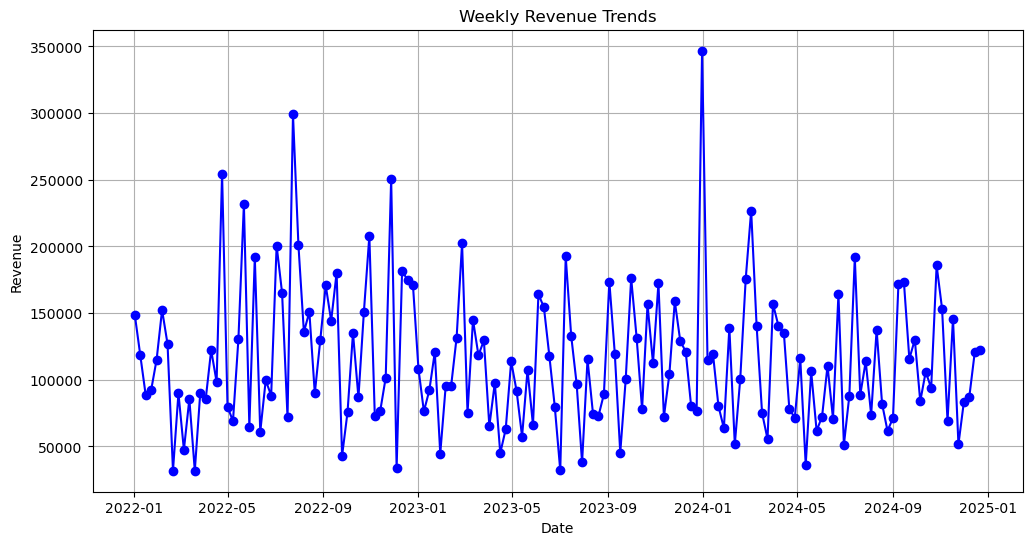

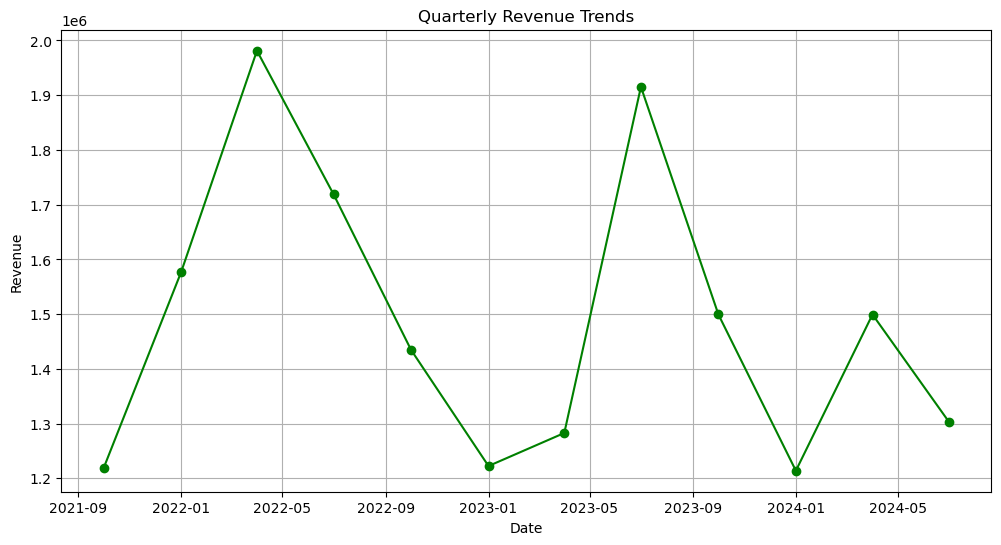

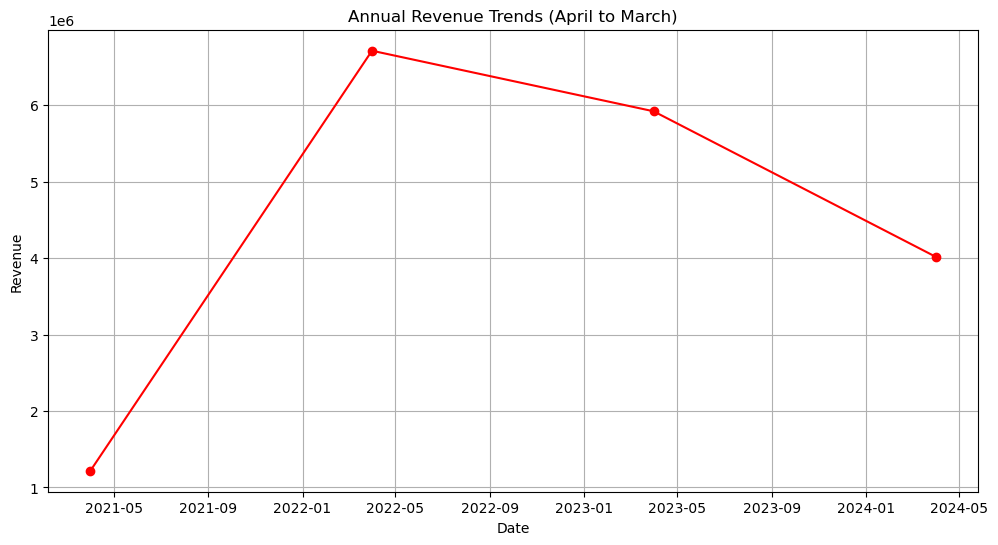

In [8]:
show_trends(df)

In [9]:
categories = {
    "Traditional Spends": [
        'spend_tv', 'spend_radio', 'spend_print'
    ],
    "Digital Spends": [
        'spend_digital_video', 'spend_digital_display', 'spend_digital_audio', 'spend_paid_social', 'spend_paid_search'
    ],
    "Other Category": [
        'revenue', 'price' 
    ]
}
df = pd.read_csv('dummy_marketing_mix_data_upd12.csv')
summary_df = summary(df, categories)
print(summary_df)

                  Column         Sum  Percentage
0               spend_tv  1368666.20   16.866275
1            spend_radio  3258843.53   40.159210
2            spend_print  3487300.21   42.974515
3    spend_digital_video  2667498.57   21.914652
4  spend_digital_display  2755488.79   22.637530
5    spend_digital_audio  1901527.56   15.621870
6      spend_paid_social  3143375.55   25.824187
7      spend_paid_search  1704324.41   14.001761
